In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.optimizers import SGD, Adam

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Load Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Normalize data

In [7]:
X_train, X_test = X_train/255.0 , X_test/255.0

### Model Train

In [8]:
i = Input(shape=X_train.shape[1:])
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

In [9]:
model = Model(i, x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
r = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3941 - accuracy: 0.8720 - val_loss: 0.1709 - val_accuracy: 0.9459
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1200 - accuracy: 0.9639 - val_loss: 0.1126 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0817 - val_accuracy: 0.9756
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0614 - accuracy: 0.9805 - val_loss: 0.0737 - val_accuracy: 0.9778
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0481 - val_accuracy: 0.9860
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0550 - val_accuracy: 0.9849
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0478 - val_accuracy:

### Model evaluation

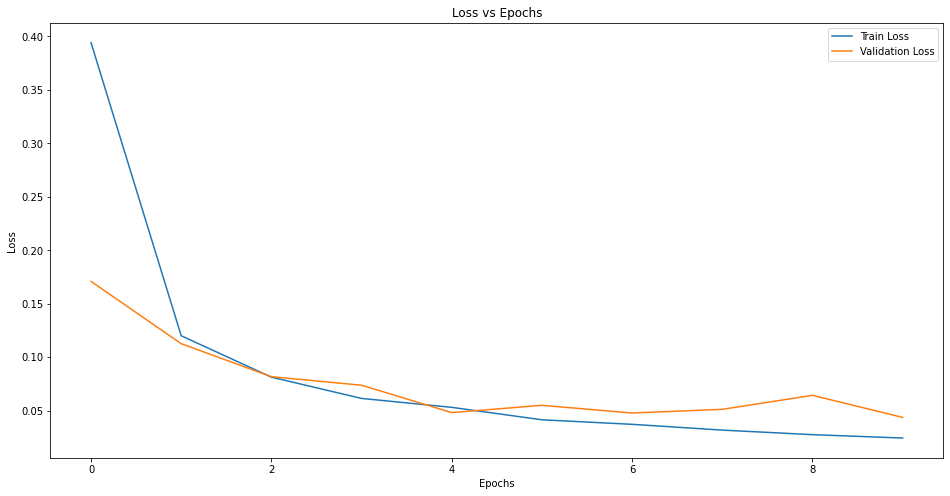

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

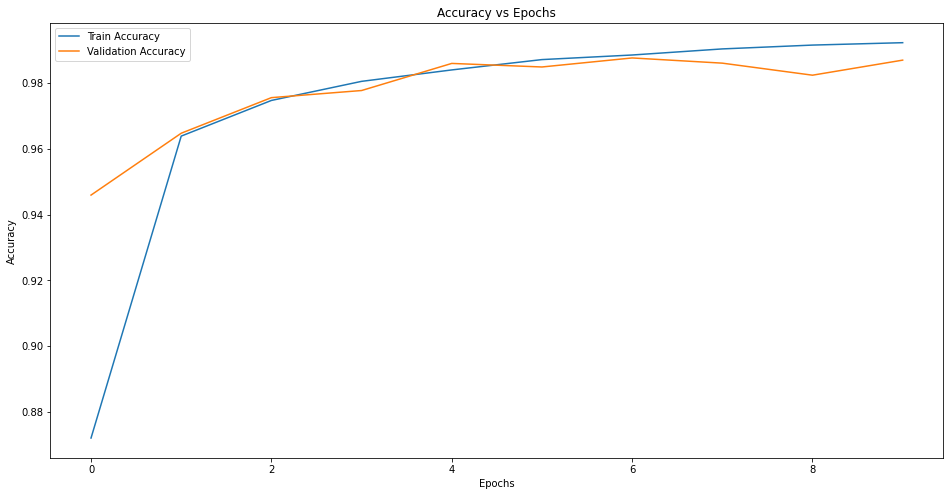

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predictions

In [14]:
t_loss, t_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9852


Plot test loss and test accuracy

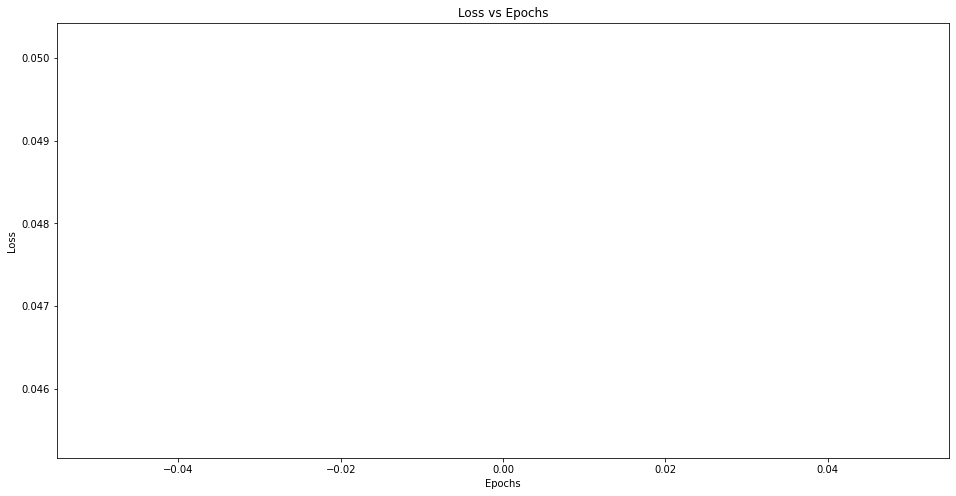

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(t_loss, label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

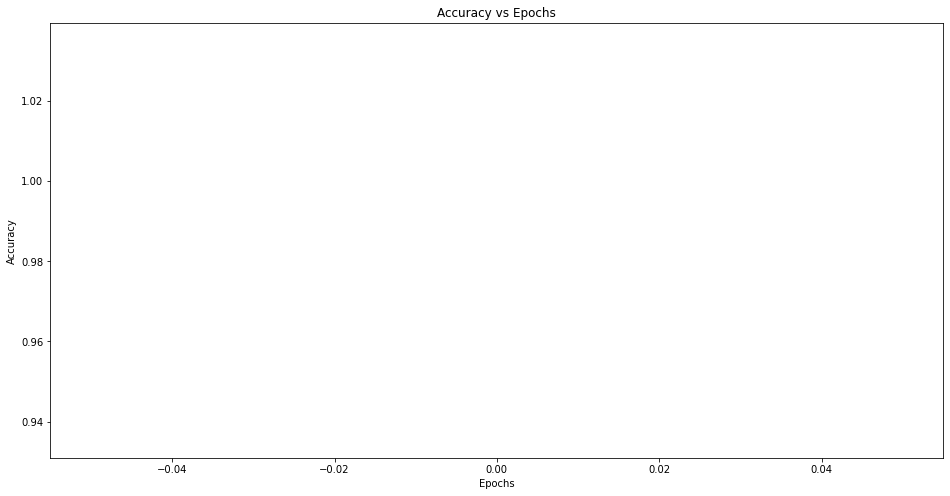

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(t_acc, label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Check confusion matrix of predictions

In [20]:
y_pred = model.predict(X_test).argmax(axis=1)

In [18]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)

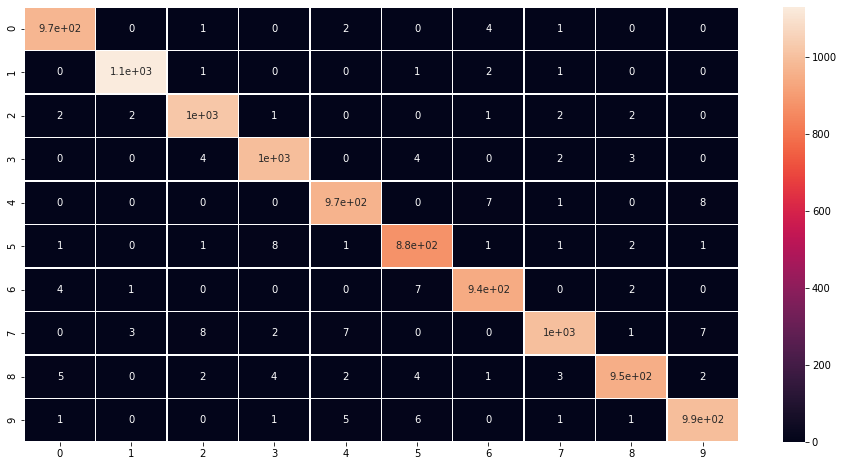

In [22]:
plt.figure(figsize=(16, 8))
sns.heatmap(cm, linewidths=0.5, annot=True)
plt.show()